# How to visualize sound. What makes a tone different from another.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import os

In [55]:
audio_data_path = '../data/audio'
print(list(os.listdir(f'{audio_data_path}/genres_original/')))
print("Genre Classification")

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Genre Classification


<h3>#Explore Audio Data¶ <br>
#We will use librosa, which is the mother of audio files.</h3>
Explore Audio Data
We will use librosa, which is the mother of audio files.

Understanding Audio
Let's first Explore our Audio Data to see how it looks (we'll work with reggae.00036.wav file).

Sound: sequence of vibrations in varying pressure strengths (y)
The sample rate (sr) is the number of samples of audio carried per second, measured in Hz or kHz

In [56]:
# Loading one file
print(np.__version__)
y, sr = librosa.load(f'{audio_data_path}/genres_original/reggae/reggae.00036.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)


1.24.0
y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [57]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

Audio File shape: (661794,)


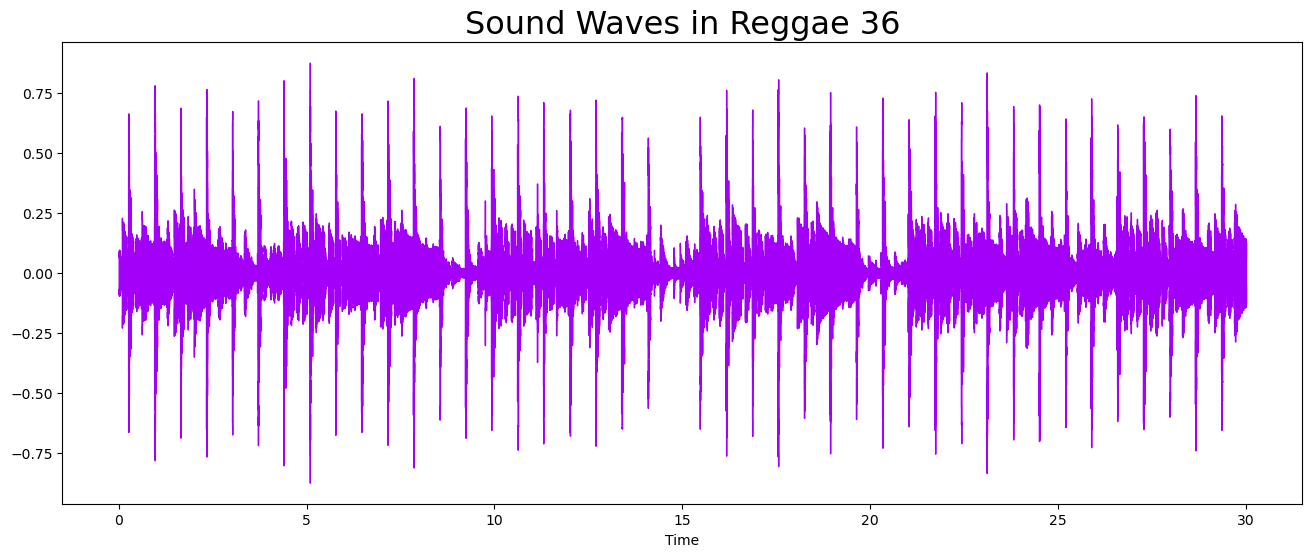

In [6]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
#librosa.display.waveplot(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Reggae 36", fontsize = 23);

In [7]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


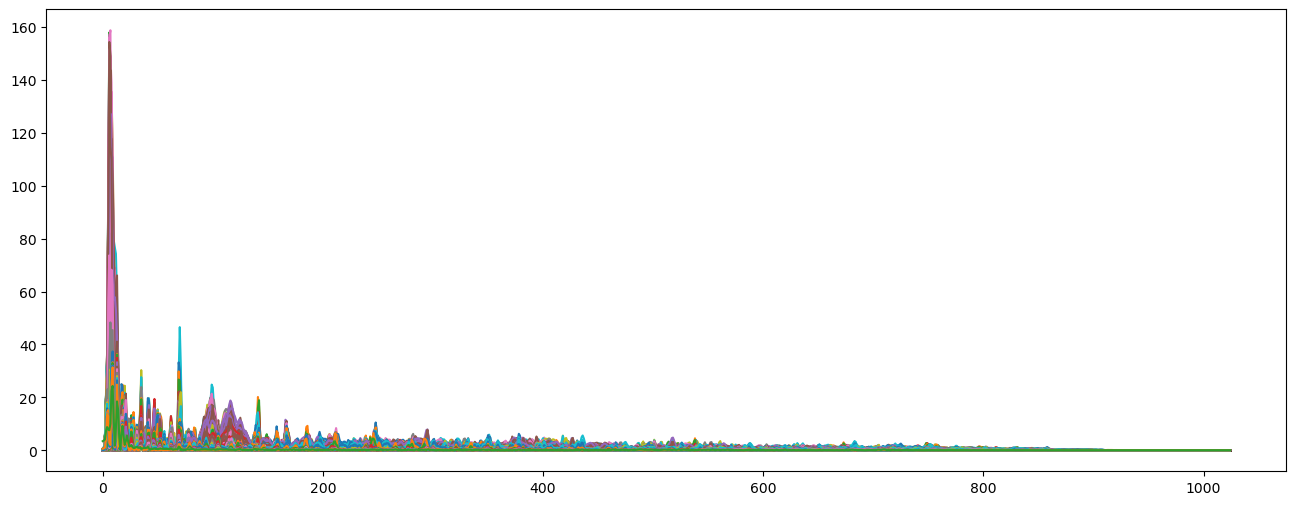

In [8]:
plt.figure(figsize = (16, 6))
plt.plot(D);

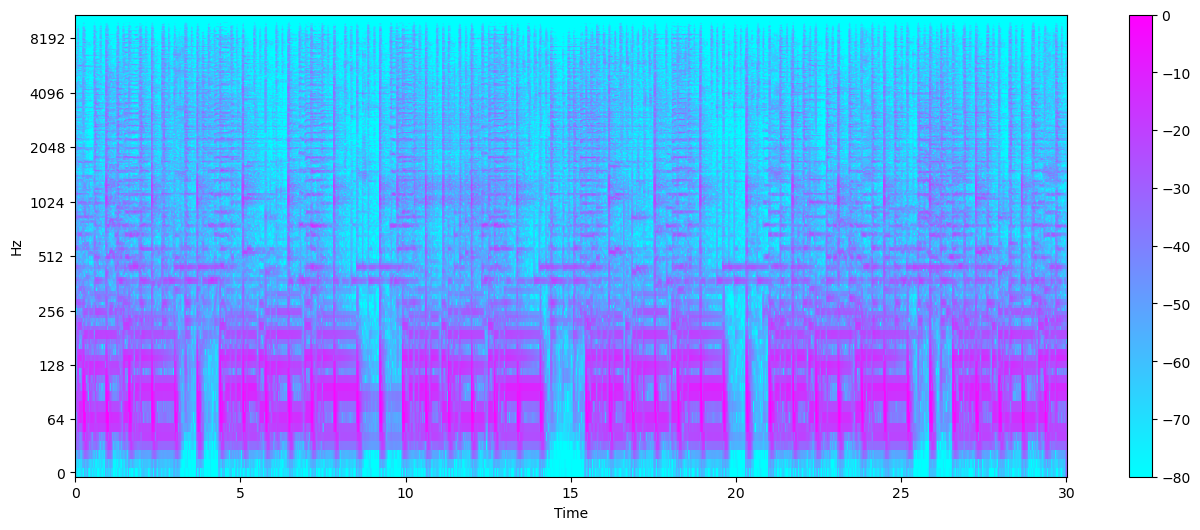

In [9]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

Mel Spectrogram
The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

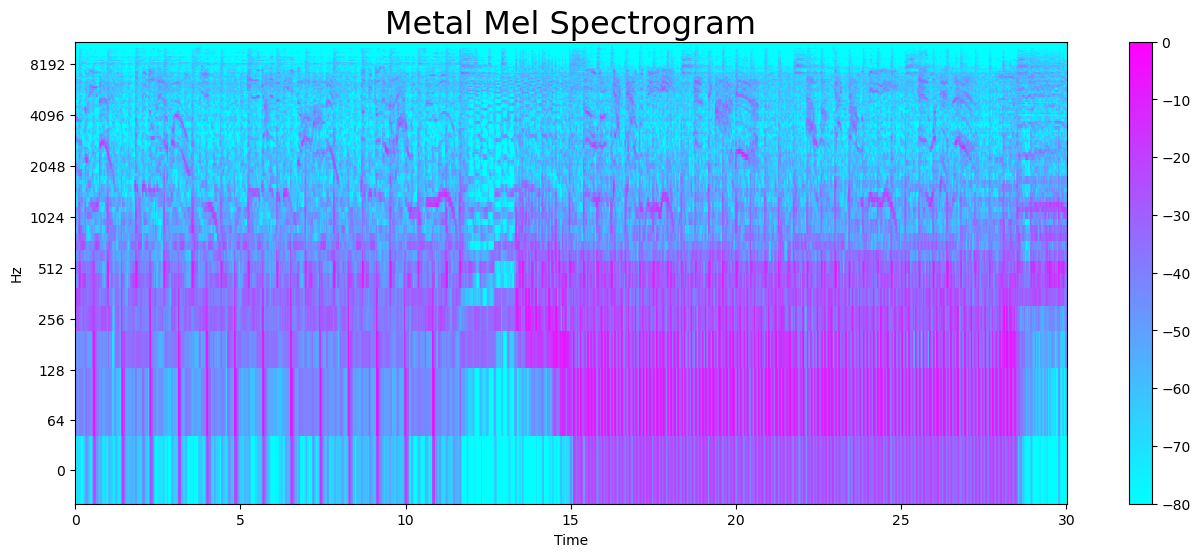

In [10]:
y, sr = librosa.load(f'{audio_data_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)
#librosa.feature.melspectrogram(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

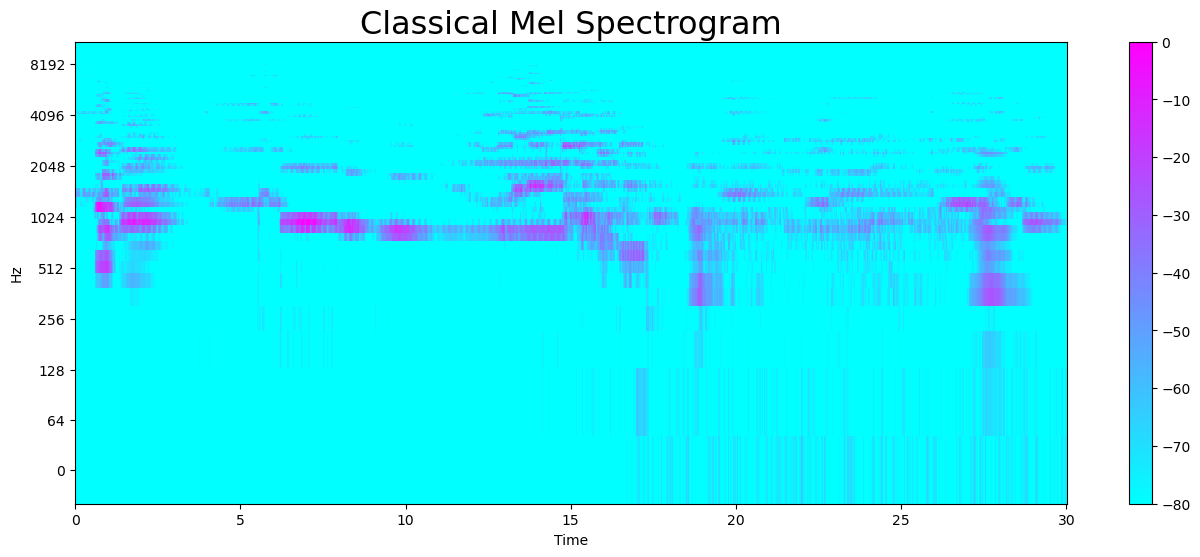

In [11]:
y, sr = librosa.load(f'{audio_data_path}/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Classical Mel Spectrogram", fontsize = 23);

Audio Features¶
Zero Crossing Rate
the rate at which the signal changes from positive to negative or back.

In [12]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

39232


Harmonics and Perceptrual
Harmonics are characteristichs that human years can't distinguish (represents the sound color)
Perceptrual understanding shock wave represents the sound rhythm and emotion

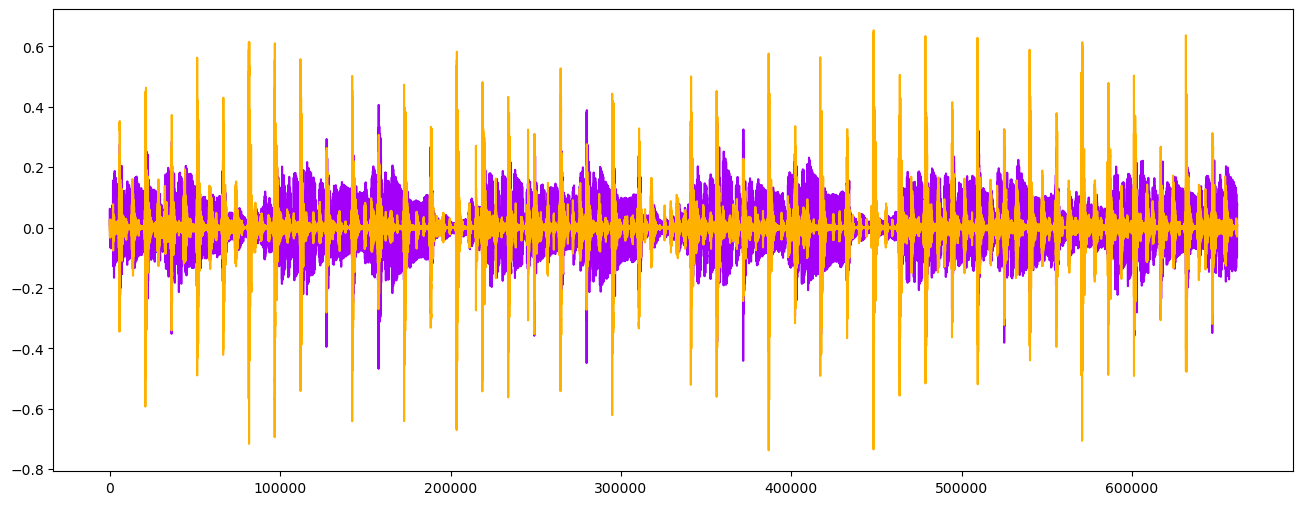

In [13]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

Tempo BMP (beats per minute)¶
Dynamic programming beat tracker.

In [14]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

array([107.66601562])

Spectral Centroid
indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound

y: The audio signal (time-domain signal).
sr: Sampling rate of the audio signal.

In [15]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1758.29476432 1946.74243678 2038.8113414  ...  766.50416352 1041.07728901
 1391.05145642] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


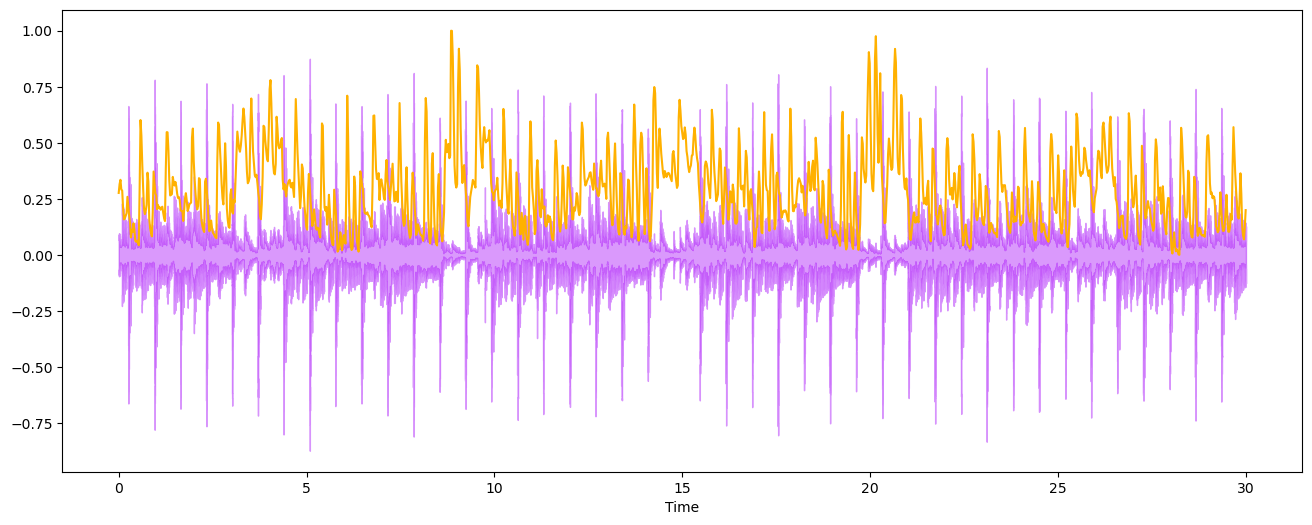

In [16]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

Spectral Rolloff
is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

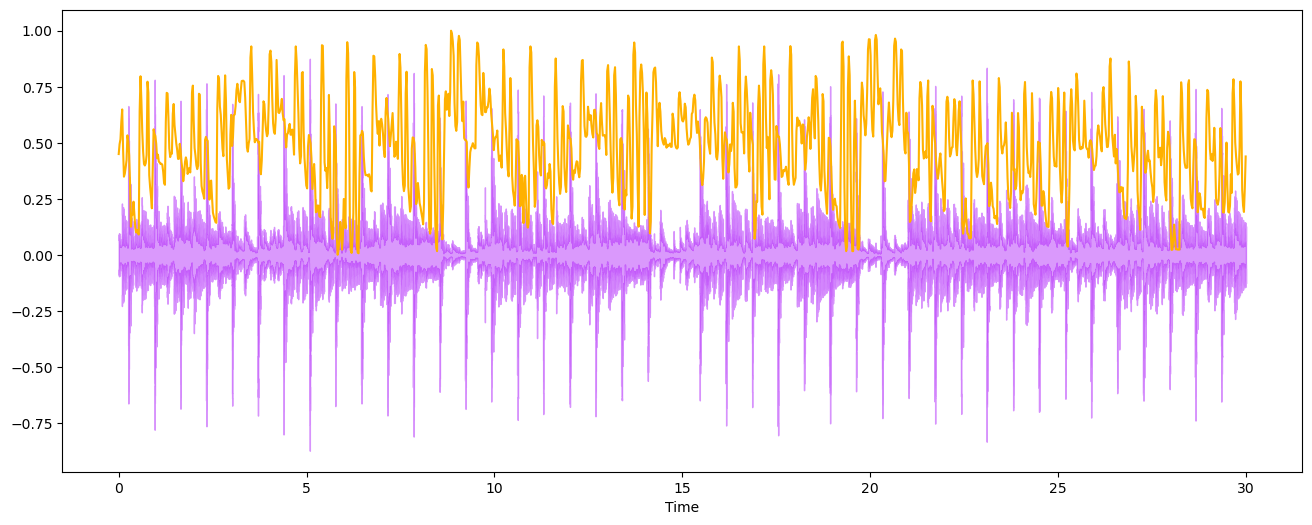

In [17]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

Mel-Frequency Cepstral Coefficients:
The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 1293)


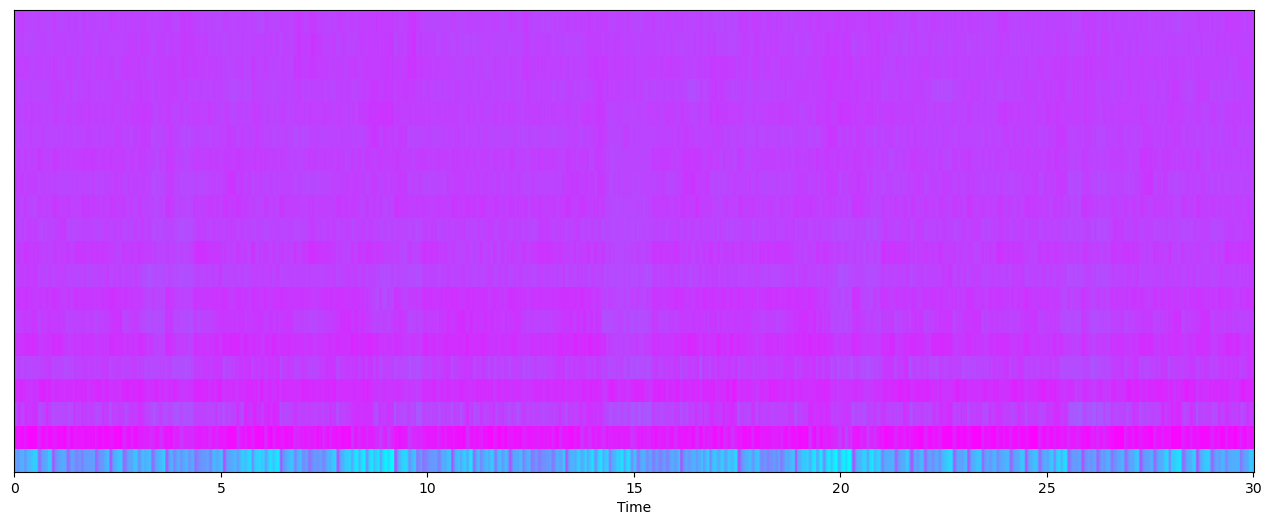

In [18]:
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Data needs to be scaled:

Mean: -1.9176745e-09 

Var: 1.0000001


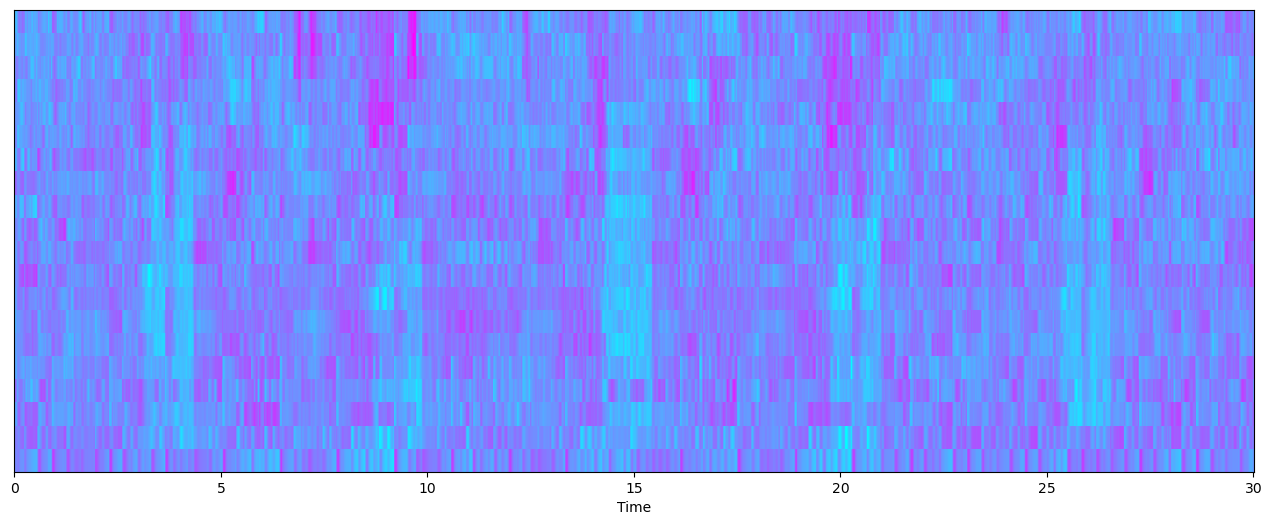

In [19]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

Chroma Frequencies¶
Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 133)


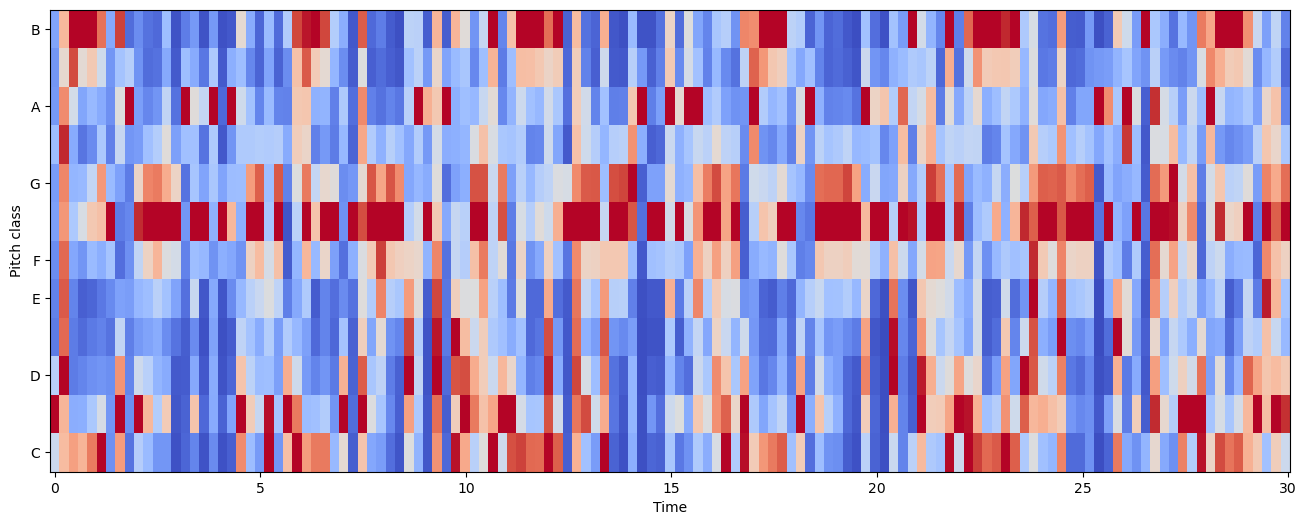

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

EDA
EDA is going to be performed on the features_30_sec.csv. This file contains the mean and variance for each audio file fo the features analysed above.

So, the table has a final of 1000 rows (10 genrex x 100 audio files) and 60 features (dimensionalities).

In [21]:
data = pd.read_csv(f'{audio_data_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

Correlation Heatmap for feature means¶

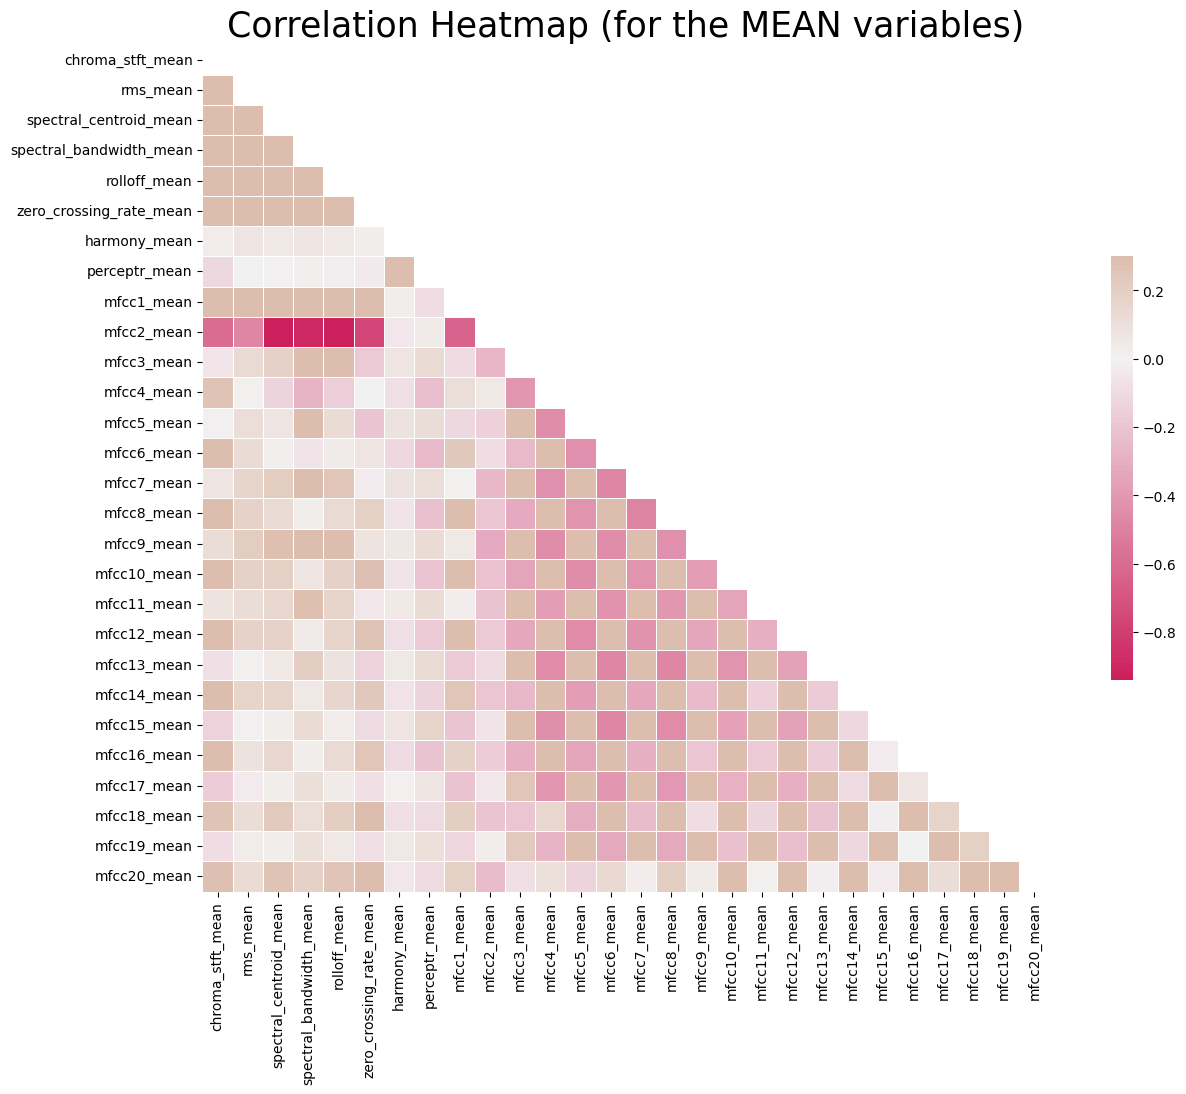

In [22]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

Box Plot for Genres Distributions

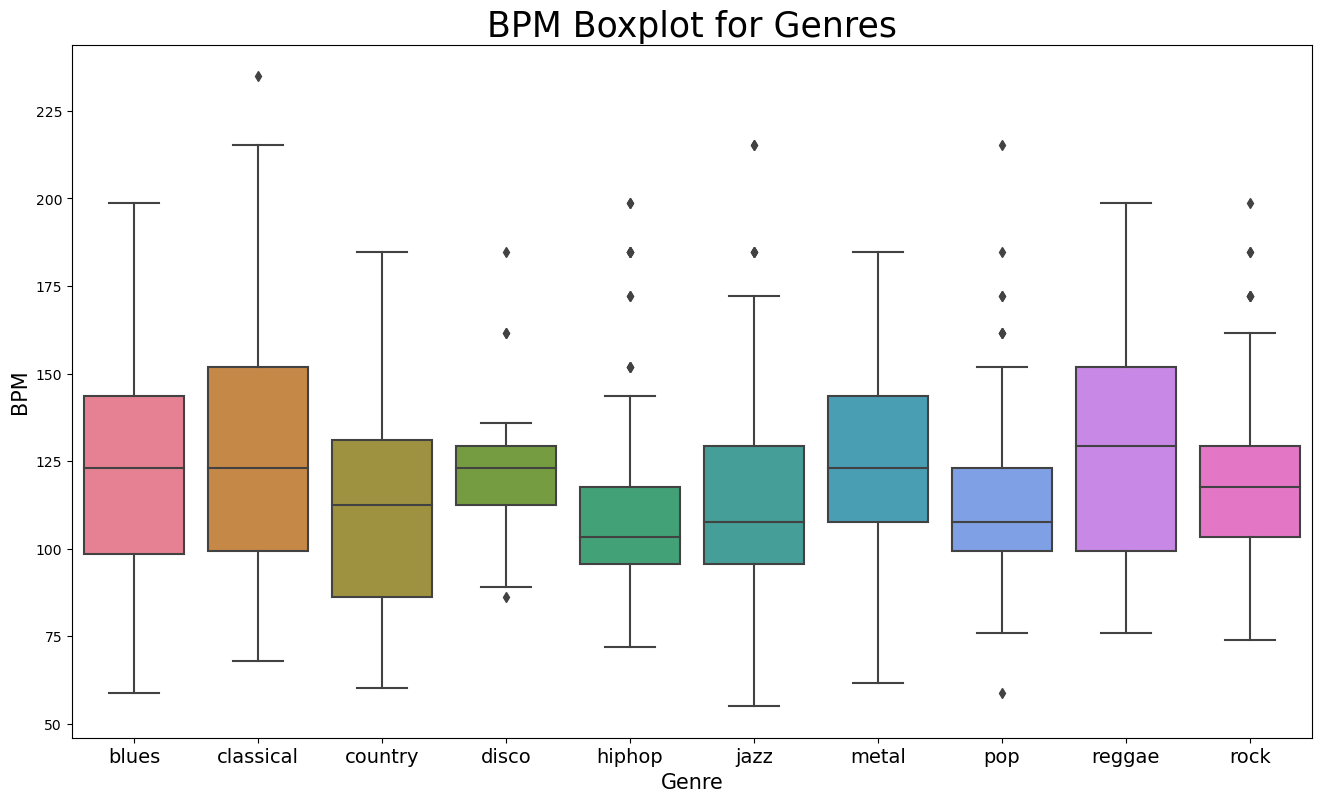

In [23]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

Principal Component Analysis - to visualize possible groups of genres¶
Normalization
PCA
The Scatter Plot

In [24]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

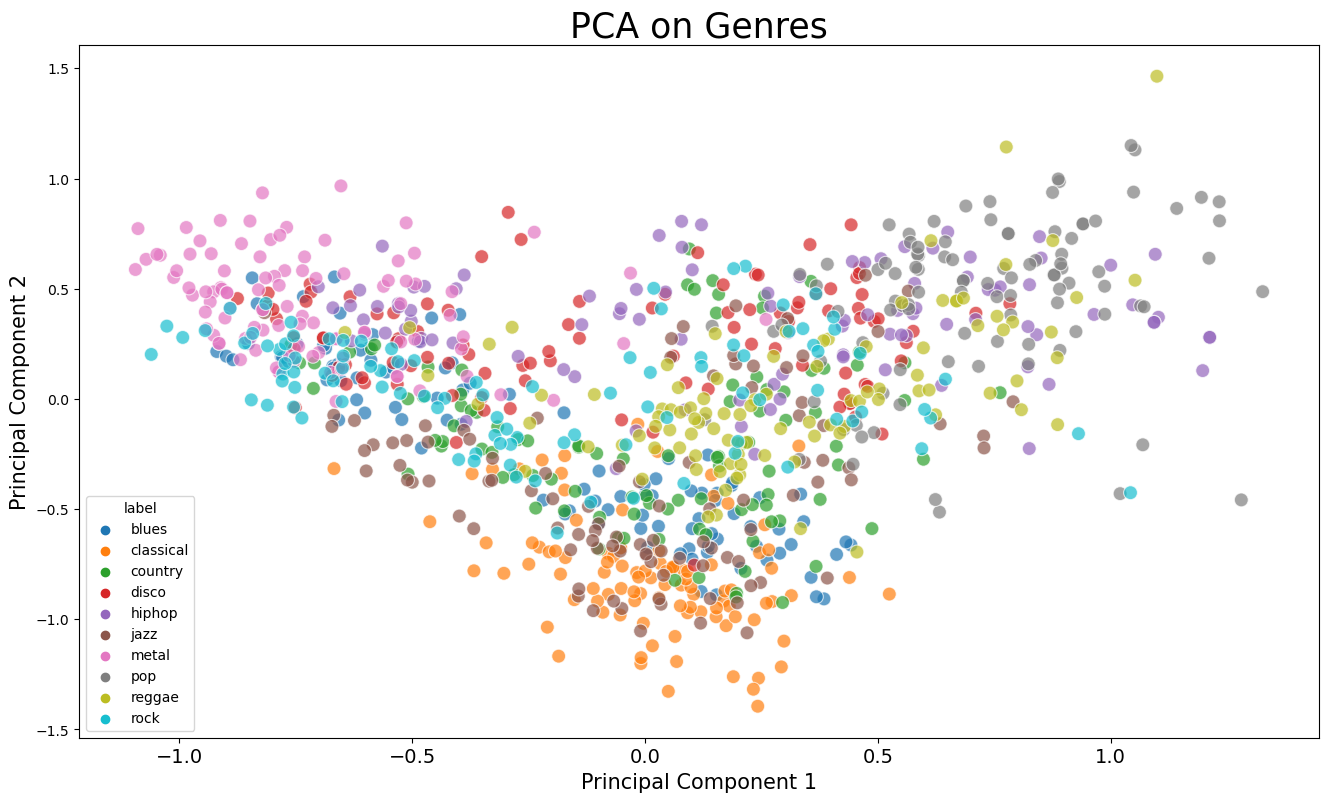

In [25]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

Machine Learning Classification¶
Using the features_3_sec.csv file, we can try to build a classifier that accurately predicts for any new audio file input it's genre.

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

Reading in the Data
Now let's try to predict the Genre of the audio using Machine Learning techniques.

In [58]:
data = pd.read_csv(f'{audio_data_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

Features and Target variable
creates the target and feature variables
normalizes the data

In [28]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

Splitting the data into training and testing¶
70% - 30% split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating a Predefined function to assess the accuracy of a model
input is the model
fits the model on the training dataset
predicts on the testing features
compares the predictions with the actuals

In [30]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [31]:
def model_assess_xgboost(model, X_train, y_train, y_test ,title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

Trying 10 different models to assess their performance¶
We tried 10 classification models, the best performing model was XGBooster.

In [32]:
# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")



Accuracy Decission trees : 0.64631 

Accuracy Random Forest : 0.81281 



In [33]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

Accuracy Naive Bayes : 0.51952 



In [34]:
# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

Accuracy Stochastic Gradient Descent : 0.65532 



In [35]:
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

Accuracy KNN : 0.80581 



In [36]:
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

Accuracy Support Vector Machine : 0.75409 



In [37]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

Accuracy Logistic Regression : 0.6977 



In [38]:
# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

Accuracy Neural Nets : 0.67 



In [39]:
# Final model
label_encoder = LabelEncoder()
# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)
# Transform the test labels (if needed)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess_xgboost(xgb, X_train, y_train_encoded,y_test_encoded,"Cross Gradient Booster")

Accuracy Cross Gradient Booster : 0.90123 



In [41]:


# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess_xgboost(xgbrf, X_train, y_train_encoded,y_test_encoded,"Cross Gradient Booster (Random Forest)")

Accuracy Cross Gradient Booster (Random Forest) : 0.74741 



In [42]:


xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train_encoded)
preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test_encoded, preds), 5), '\n')

Accuracy : 0.90123 



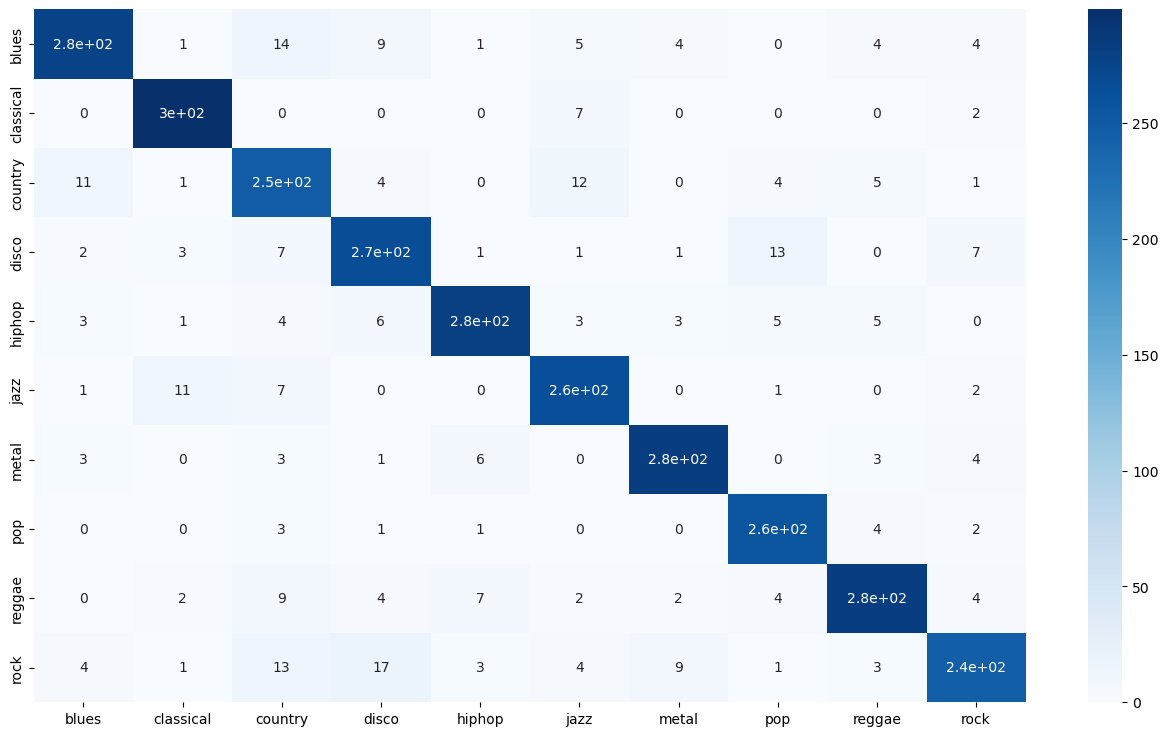

In [43]:
# Confusion Matrix
confusion_matr = confusion_matrix(y_test_encoded, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

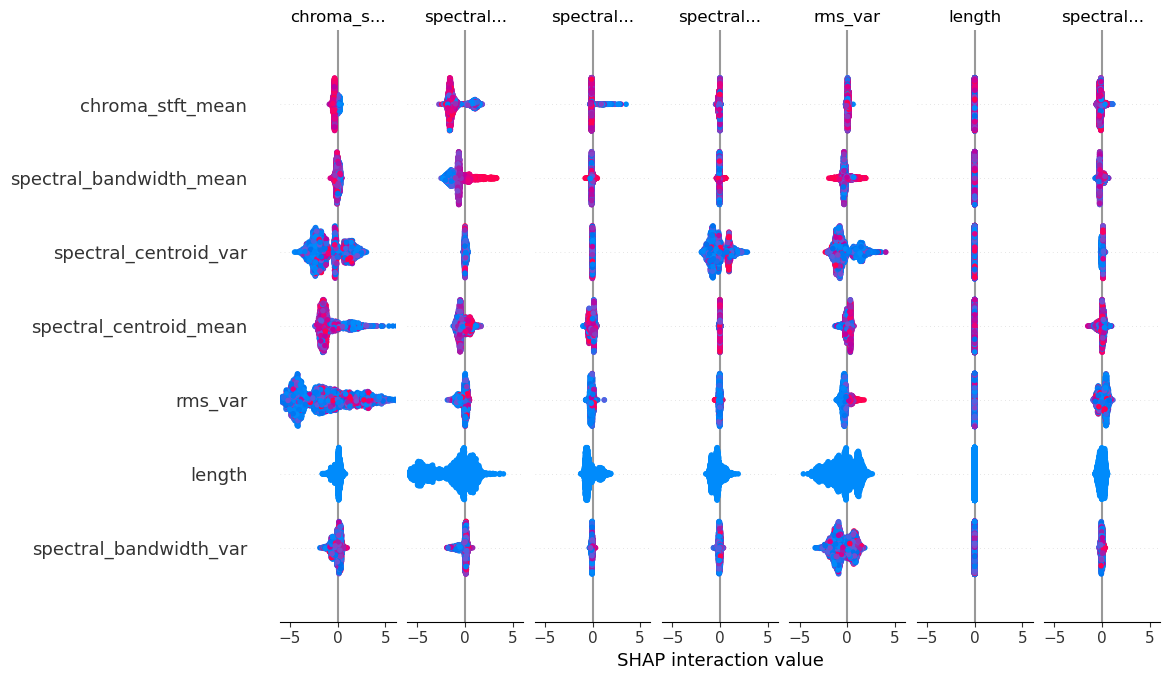

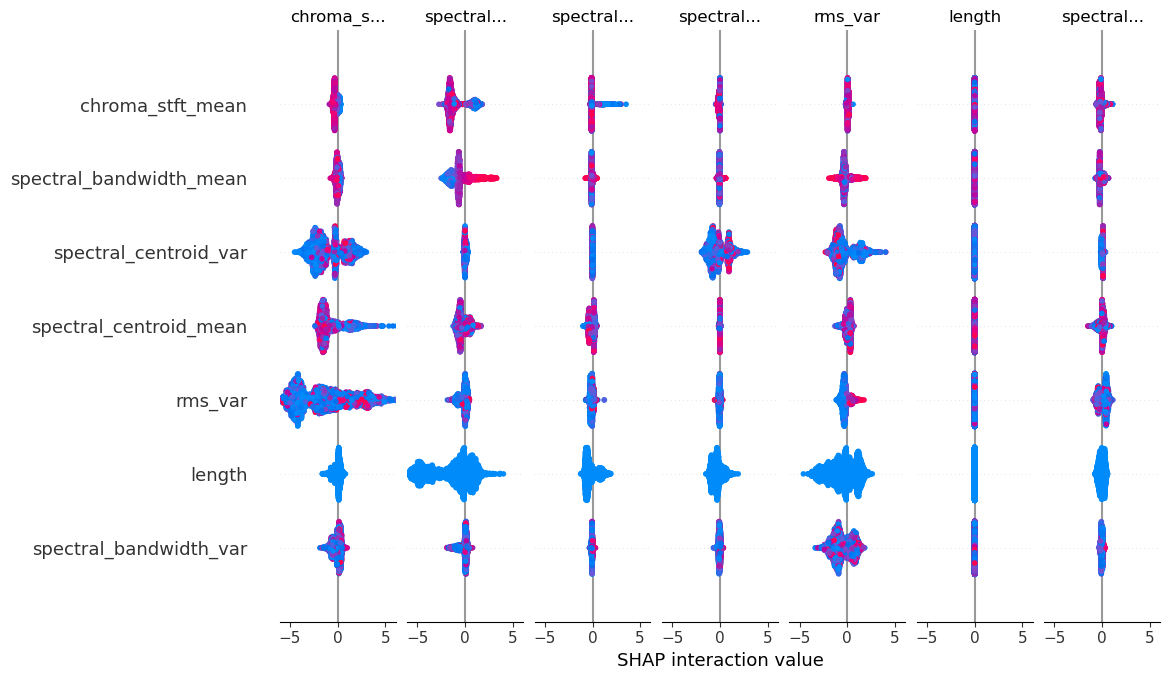

In [44]:
import shap

# Create a SHAP Explainer
explainer = shap.TreeExplainer(xgb)
# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Create a summary plot
shap.summary_plot(shap_values, X_test)

# Create a bar plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


Feature Importance

In [54]:
#import eli5



Recommender Systems
"Recomender" Systems enable us for any given vector to find the best similarity, ranked in descending order, from the bast match to the least best match.

For Audio files, this will be done through cosine_similarity library.

In [46]:
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [47]:
# Read data
data = pd.read_csv(f'{audio_data_path}/features_30_sec.csv', index_col='filename')
# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length','label'])
data.head()



chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
filename                                                                 
blues.00000.wav          0.350088         0.088757  0.130228  0.002827   
blues.00001.wav          0.340914         0.094980  0.095948  0.002373   
blues.00002.wav          0.363637         0.085275  0.175570  0.002746   
blues.00003.wav          0.404785         0.093999  0.141093  0.006346   
blues.00004.wav          0.308526         0.087841  0.091529  0.002303   

                 spectral_centroid_mean  spectral_centroid_var  \
filename                                                         
blues.00000.wav             1784.165850          129774.064525   
blues.00001.wav             1530.176679          375850.073649   
blues.00002.wav             1552.811865          156467.643368   
blues.00003.wav             1070.106615          184355.942417   
blues.00004.wav             1835.004266          343399.939274   

                 spectral_bandwidth_mean  spectral_bandwidth_var  \
filename                                                           
blues.00000.wav              2002.449060            85882.761315   
blues.00001.wav              2039.036516           213843.755497   
blues.00002.wav              1747.702312            76254.192257   
blues.00003.wav              1596.412872           166441.494769   
blues.00004.wav              1748.172116            88445.209036   

                 rolloff_mean   rolloff_var  ...  mfcc16_mean  mfcc16_var  \
filename                                     ...                            
blues.00000.wav   3805.839606  9.015054e+05  ...     0.752740   52.420910   
blues.00001.wav   3550.522098  2.977893e+06  ...     0.927998   55.356403   
blues.00002.wav   3042.260232  7.840345e+05  ...     2.451690   40.598766   
blues.00003.wav   2184.745799  1.493194e+06  ...     0.780874   44.427753   
blues.00004.wav   3579.757627  1.572978e+06  ...    -4.520576   86.099236   

                 mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  \
filename                                                            
blues.00000.wav    -1.690215   36.524071    -0.408979   41.597103   
blues.00001.wav    -0.731125   60.314529     0.295073   48.120598   
blues.00002.wav    -7.729093   47.639427    -1.816407   52.382141   
blues.00003.wav    -3.319597   50.206673     0.636965   37.319130   
blues.00004.wav    -5.454034   75.269707    -0.916874   53.613918   

                 mfcc19_mean  mfcc19_var  mfcc20_mean  mfcc20_var  
filename                                                           
blues.00000.wav    -2.303523   55.062923     1.221291   46.936035  
blues.00001.wav    -0.283518   51.106190     0.531217   45.786282  
blues.00002.wav    -3.439720   46.639660    -2.231258   30.573025  
blues.00003.wav    -0.619121   37.259739    -3.407448   31.949339  
blues.00004.wav    -4.404827   62.910812   -11.703234   55.195160  

[5 rows x 57 columns]

In [48]:
# Scale the data
data_scaled=preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))

Scaled data type: <class 'numpy.ndarray'>


Cosine similarity¶
Calculates the pairwise cosine similarity for each combination of songs in the data. This results in a 1000 x 1000 matrix (with redundancy in the information as item A similarity to item B == item B similarity to item A).

In [49]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)
# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

Song similarity scoring
find_similar_songs() - is a predefined function that takes the name of the song and returns top 5 best matches for that song.

In [50]:
def find_similar_songs(name):
    # Find songs most similar to another song
    series = sim_df_names[name].sort_values(ascending = False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Display the 5 top matches 
    print("\n*******\nSimilar songs to ", name)
    print(series.head(5))

Putting the Similarity Function into Action:
POP Example¶

In [51]:
# pop.00019 - Britney Spears "Hit me baby one more time"
find_similar_songs('pop.00019.wav') 

ipd.Audio(f'{audio_data_path}/genres_original/pop/pop.00019.wav')


*******
Similar songs to  pop.00019.wav
filename
pop.00023.wav    0.862836
pop.00034.wav    0.860499
pop.00078.wav    0.829135
pop.00088.wav    0.824456
pop.00091.wav    0.802269
Name: pop.00019.wav, dtype: float64


Similar song match no.1¶
Britney Spears - I'm so curious (2009 remaster)

In [52]:
ipd.Audio(f'{audio_data_path}/genres_original/pop/pop.00023.wav')

METAL Example

In [53]:
# metal.00002 - Iron Maiden "Flight of Icarus"
find_similar_songs('metal.00002.wav') 

ipd.Audio(f'{audio_data_path}/genres_original/metal/metal.00002.wav')


*******
Similar songs to  metal.00002.wav
filename
metal.00028.wav    0.904367
metal.00059.wav    0.896096
rock.00018.wav     0.891910
rock.00017.wav     0.886526
rock.00016.wav     0.867508
Name: metal.00002.wav, dtype: float64
